## 📂 Chargement du dataset nettoyé
Nous chargeons le fichier `final_clean_dataset.csv` pour effectuer l’analyse exploratoire.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement du dataset final
df = pd.read_csv("../datasets/final_clean_dataset.csv")

# Aperçu
df.head()

,bind,CertControlStore,CertOpenStore,closesocket,CoCreateInstance,CoCreateInstanceEx,CoGetClassObject,CoInitializeEx,CoInitializeSecurity,connect,...,HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Internet Settings\,HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Internet Settings\,HKEY_LOCAL_MACHINE\SOFTWARE\MICROSOFT\Cryptography\.1,HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\services\crypt32\,HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\services\Tcpip\Parameters\,HKEY_LOCAL_MACHINE\Software\Microsoft\Rpc\,HKEY_CURRENT_USER\Software\Microsoft\RestartManager,HKEY_LOCAL_MACHINE\SYSTEM\Setup\OOBEInProgress,HKEY_LOCAL_MACHINE\SYSTEM\Setup\SystemSetupInProgress,Label
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,13,56,0,0,3,0,28,2,0,...,54,0,148,54,18,0,0,0,3,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 📊 Statistiques descriptives globales
Nous examinons les principales statistiques des colonnes numériques pour détecter les variations, les extrêmes et les patterns intéressants.

In [3]:
# Afficher les statistiques globales sur toutes les colonnes sauf 'Label'
df.drop(columns='Label').describe().T.sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
GetSystemMetrics,1042.0,4325.812860,16046.260557,0.0,0.0,0.0,274.00,231615.0
NtClose,1042.0,3124.704415,18601.001232,0.0,0.0,33.5,1428.25,348124.0
GetKeyState,1042.0,1573.630518,6606.440838,0.0,0.0,0.0,0.00,97077.0
GetSystemTimeAsFileTime,1042.0,1294.936660,31849.463510,0.0,0.0,3.0,74.00,1019719.0
NtReadFile,1042.0,1285.582534,7885.265829,0.0,0.0,0.0,171.25,143706.0
SetEndOfFile,1042.0,1199.966411,21113.909708,0.0,0.0,0.0,0.00,394986.0
HKEY_LOCAL_MACHINE\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\,1042.0,1040.455854,2398.639621,0.0,0.0,0.0,25.00,14965.0
SetFilePointer,1042.0,905.941459,7773.295765,0.0,0.0,0.0,14.00,147277.0
NtWriteFile,1042.0,807.184261,4053.499747,0.0,0.0,0.0,74.00,79186.0
NtQueryKey,1042.0,790.820537,2258.858516,0.0,0.0,0.0,15.50,18451.0


## 📊 Top 10 des APIs les plus appelées (moyenne)
Ce graphique montre les 10 fonctions APIs avec la moyenne d'appels la plus élevée dans le dataset.


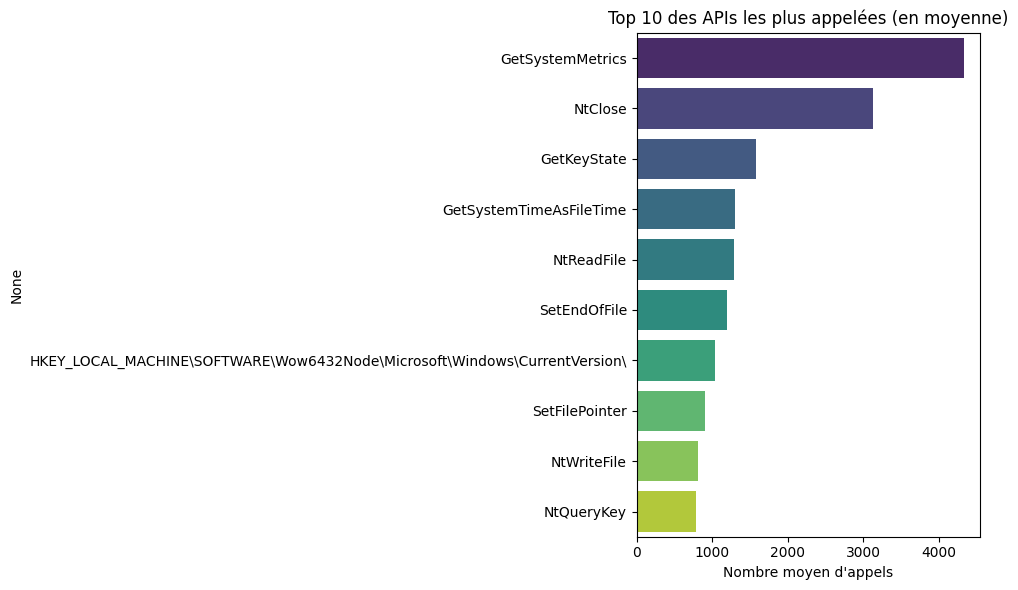

In [ ]:
# Recalculer les moyennes sans la colonne Label
top_apis = df.drop(columns='Label').mean().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_apis.values, y=top_apis.index, hue=top_apis.index, palette='viridis', legend=False)
plt.xlabel("Nombre moyen d'appels")
plt.title("Top 10 des APIs les plus appelées (en moyenne)")
plt.tight_layout()

# Sauvegarde
plt.savefig("../visuals/top10_apis_moyenne.png", dpi=300)
plt.show()

## 📦 Analyse des valeurs extrêmes avec des boxplots
Nous traçons des boxplots pour les 5 APIs les plus utilisées afin de visualiser les valeurs aberrantes et la dispersion.

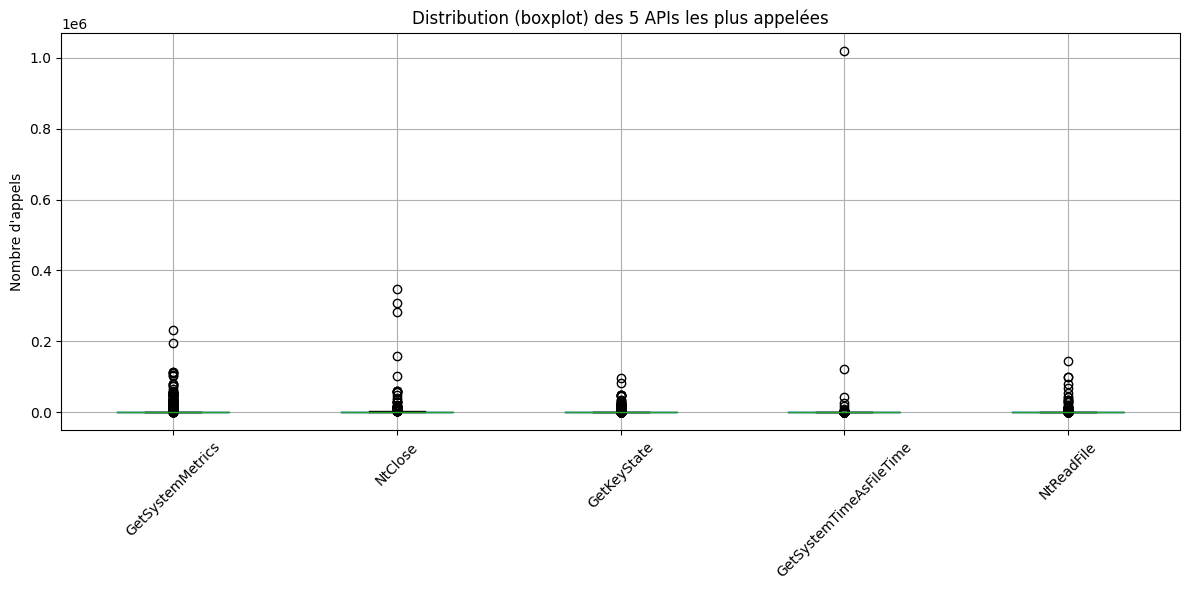

In [17]:
# Sélection des 5 APIs les plus appelées (déjà triées)
top5_apis = top_apis.index[:5]

# Tracé des boxplots
plt.figure(figsize=(12, 6))
df[top5_apis].boxplot()
plt.title("Distribution (boxplot) des 5 APIs les plus appelées")
plt.ylabel("Nombre d'appels")
plt.xticks(rotation=45)
plt.tight_layout()

# Sauvegarde
plt.savefig("../visuals/boxplot_top5_apis.png", dpi=300)
plt.show()

## 🔗 Matrice de corrélation entre les APIs
Nous calculons et visualisons les corrélations entre les colonnes pour détecter d’éventuelles redondances entre les APIs.

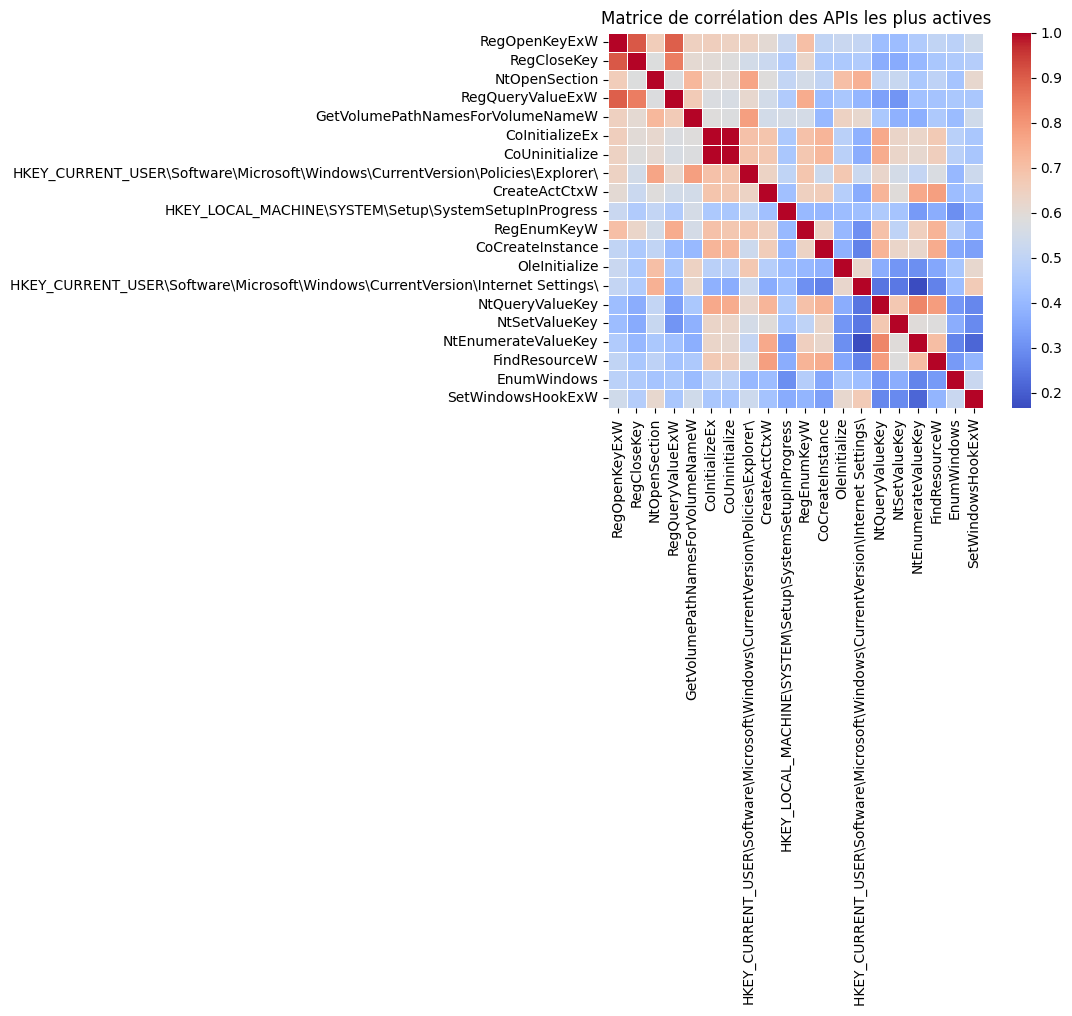

In [ ]:
# Calculer la matrice de corrélation (sans la colonne Label)
corr_matrix = df.drop(columns='Label').corr()

# Prendre les 20 APIs les plus corrélées entre elles
# (optionnel : pour éviter surcharge visuelle)
subset = corr_matrix.abs().mean().sort_values(ascending=False).head(20).index
corr_subset = corr_matrix.loc[subset, subset]

# Affichage avec heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_subset, cmap='coolwarm', annot=False, square=True, linewidths=0.5)
plt.title("Matrice de corrélation des APIs les plus actives")
plt.tight_layout()

# Sauvegarde
plt.savefig("../visuals/heatmap_correlation_top20.png", dpi=300)
plt.show()

## 📊 Moyenne des appels API par classe (R vs G)
Nous comparons les moyennes d’appel des APIs entre les ransomware (`R`) et les goodware (`G`), afin de repérer celles qui discriminent fortement entre les deux types.


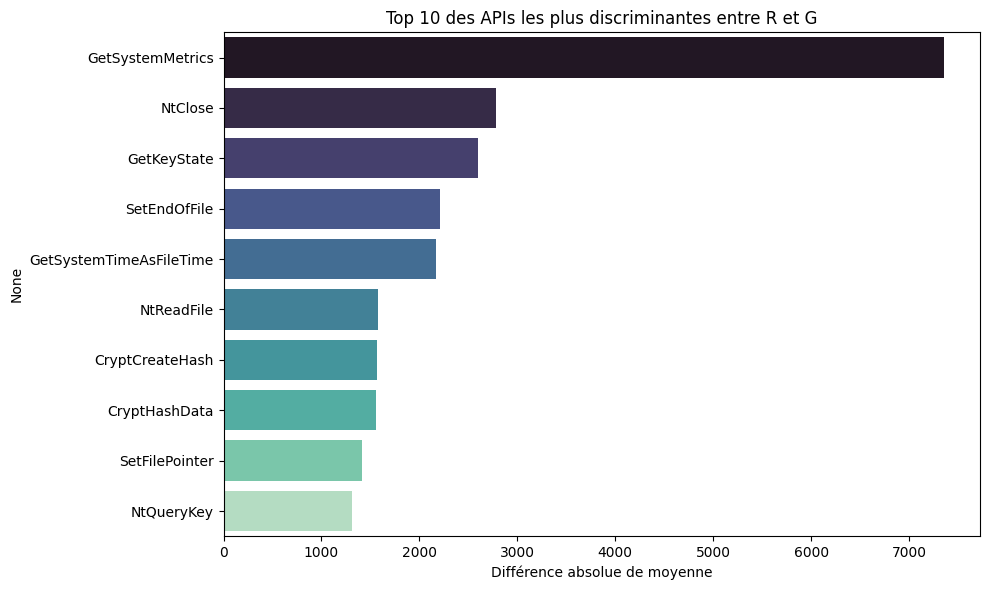

In [9]:
# Moyenne des appels API par classe
api_means_by_class = df.groupby('Label').mean().T

# Calcul de la différence
api_means_by_class['Diff'] = api_means_by_class[1] - api_means_by_class[0]
top_diff = api_means_by_class['Diff'].abs().sort_values(ascending=False).head(10)

# Visualisation
plt.figure(figsize=(10,6))
sns.barplot(x=top_diff.values, y=top_diff.index, hue=top_diff.index, palette="mako", legend=False)
plt.title("Top 10 des APIs les plus discriminantes entre R et G")
plt.xlabel("Différence absolue de moyenne")
plt.tight_layout()
plt.savefig("../visuals/top10_apis_diff_rvsg.png", dpi=300)
plt.show()

## 🧬 Projection des échantillons avec PCA et t-SNE
Nous réduisons la dimension des données avec la méthode PCA (analyse en composantes principales), suivie de t-SNE (t-distributed stochastic neighbor embedding), pour visualiser si les ransomware et goodware sont séparables dans un espace 2D.


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Séparation features / labels
X = df.drop(columns="Label")
y = df["Label"]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (pour init t-SNE et comparaison)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# t-SNE (corrigé)
tsne = TSNE(n_components=2, perplexity=30, max_iter=3000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

## 🎨 Visualisation 2D des échantillons : PCA vs t-SNE
Nous affichons deux nuages de points : un avec la projection PCA, l’autre avec t-SNE, pour comparer les regroupements naturels selon la classe.


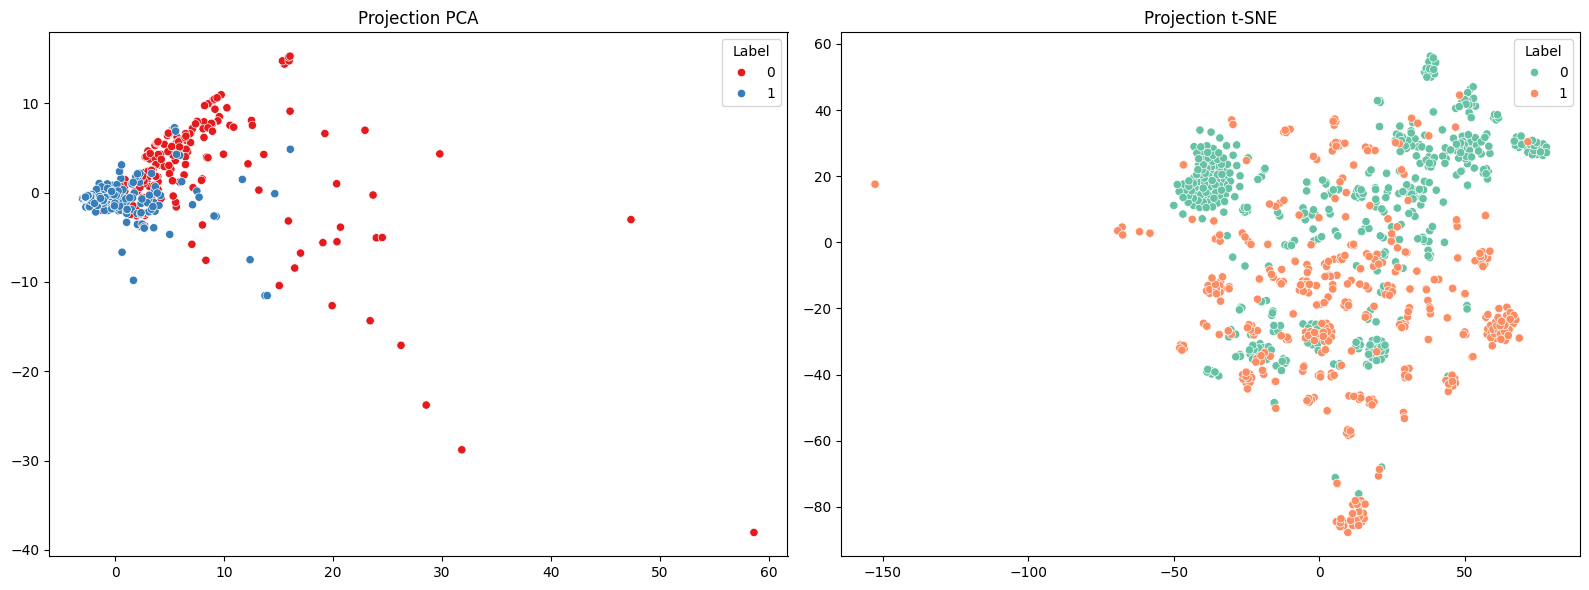

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", ax=axes[0])
axes[0].set_title("Projection PCA")

# t-SNE
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set2", ax=axes[1])
axes[1].set_title("Projection t-SNE")

plt.tight_layout()
plt.savefig("../visuals/projection_pca_tsne.png", dpi=300)
plt.show()

## 🧪 Sélection de features par ANOVA (variance inter-classes)
Nous utilisons un test ANOVA (Analyse de la Variance) pour identifier les APIs dont la moyenne d’utilisation varie significativement entre ransomware et goodware.

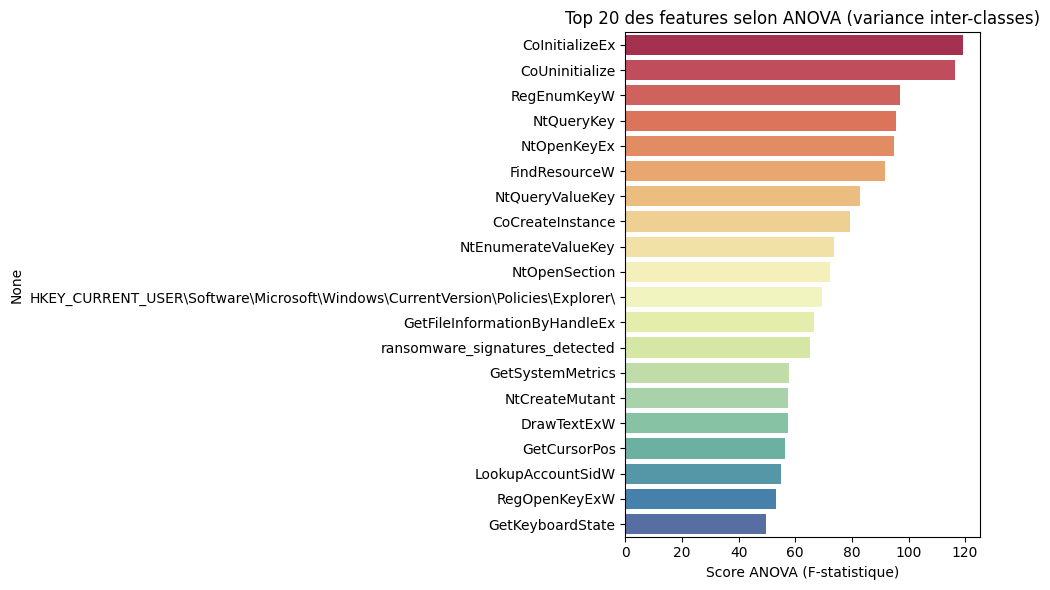

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Sélection des 20 meilleures features
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_scaled, y)

# Récupérer les scores et noms
scores = selector.scores_
top_indices = np.argsort(scores)[-20:][::-1]
top_features = X.columns[top_indices]
top_scores = scores[top_indices]

# Graphe
plt.figure(figsize=(10,6))
sns.barplot(x=top_scores, y=top_features, hue=top_features, palette='Spectral', legend=False)
plt.title("Top 20 des features selon ANOVA (variance inter-classes)")
plt.xlabel("Score ANOVA (F-statistique)")
plt.tight_layout()
plt.savefig("../visuals/top20_anova_features.png", dpi=300)
plt.show()


## 📦 Boxplots par classe (R vs G) pour 3 APIs clés
Nous affichons la distribution des appels de 3 APIs hautement discriminantes, séparées par classe, pour visualiser les différences nettes entre ransomwares et goodwares.

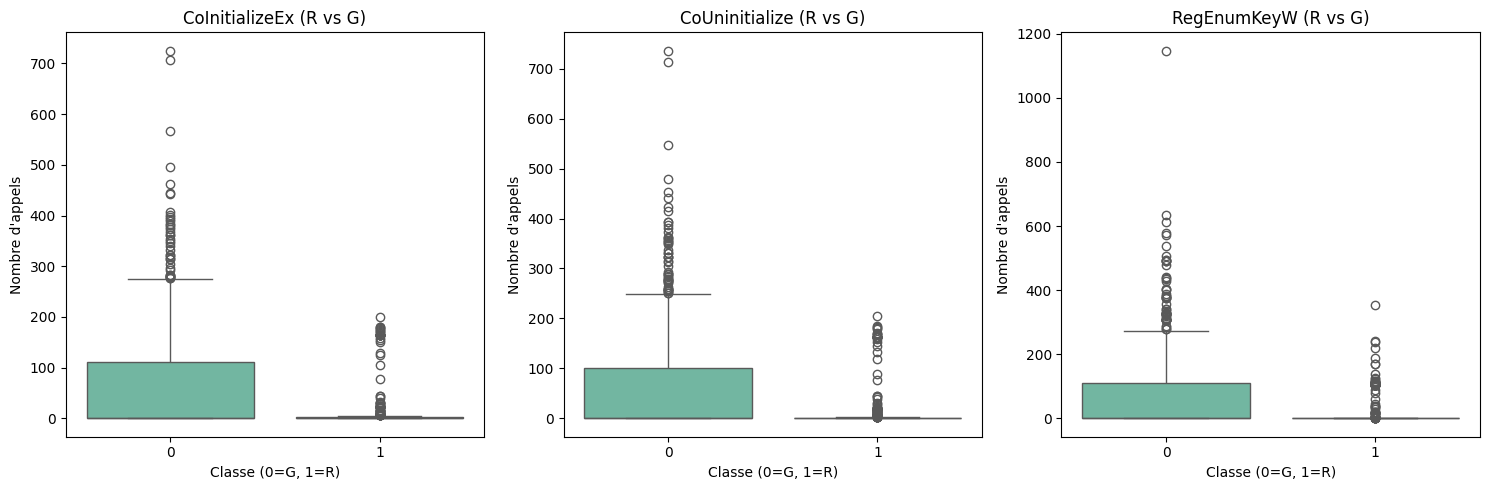

In [13]:
# Prendre les 3 features les mieux scorées à l’ANOVA
top3_features = top_features[:3]

plt.figure(figsize=(15, 5))
for i, feat in enumerate(top3_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=y, y=df[feat], hue=y, palette="Set2", legend=False)
    plt.title(f"{feat} (R vs G)")
    plt.xlabel("Classe (0=G, 1=R)")
    plt.ylabel("Nombre d'appels")

plt.tight_layout()
plt.savefig("../visuals/boxplots_top3_discriminants.png", dpi=300)
plt.show()